In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('/Users/aryantanwar/Downloads/dc - dc.csv.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,verbatim_text,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold coffee.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The lunch meal was not great.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Should sell food in the flight.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,They gave us pretzel. Nothing else.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We did not have any choice between pretzel and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryantanwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryantanwar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: >

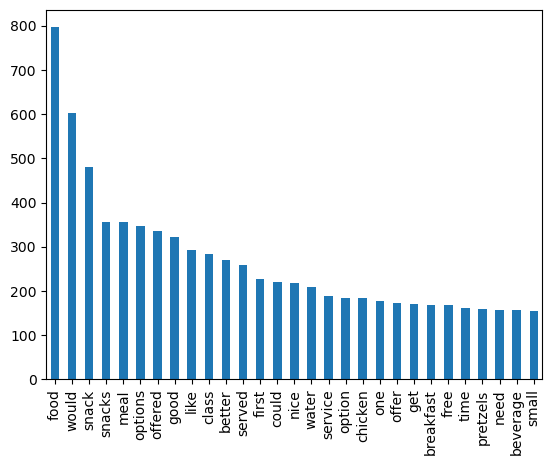

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Load NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords and initialize the vectorizer
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Read the CSV file
df = pd.read_csv('/Users/aryantanwar/Downloads/dc - dc.csv.csv')

# Define the text preprocessing functions
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    return text

def tokenize_and_remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)  # Return tokens as a cleaned sentence

# Apply text preprocessing
df['clean_text'] = df['verbatim_text'].apply(lambda x: clean_text(x))
df['clean_text_no_stopwords'] = df['clean_text'].apply(lambda x: tokenize_and_remove_stop_words(x))

# Perform sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['clean_text'].apply(lambda x: get_sentiment(x))

# Perform TF-IDF vectorization
X = vectorizer.fit_transform(df['clean_text_no_stopwords'])
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
df_tfidf = pd.DataFrame(dense, columns=feature_names)

# Plot word counts
word_counts = pd.Series(' '.join(df['clean_text_no_stopwords']).split()).value_counts()[1:30]
word_counts.plot(kind='bar')
